In [1]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.rcParams.update({'font.size': 20})
import numpy as np
from sklearn.datasets import make_circles


# Develop an algorithm for minimum distance classification using Gaussian kernels

The training data shown below is not linearly separable. A standard linear classifier will fail to classify this data. Derive the expression for a kernel version of the minimum distance classifier and assume Gaussian kernels. You may tune the hyperparameter $\sigma$ manually to get better classification.

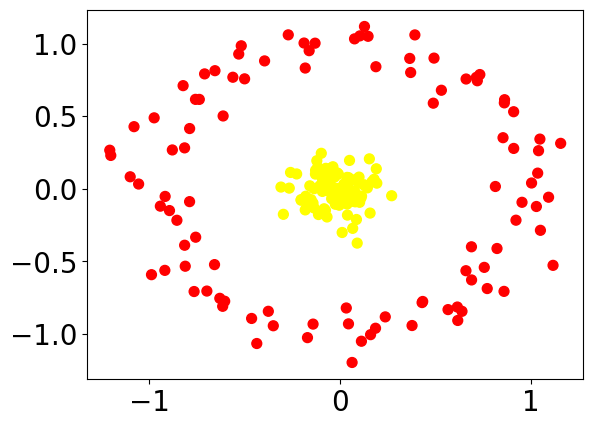

In [2]:
X, y = make_circles(200, factor=.1, noise=.1)
t = np.floor(2*(y-0.5))
t = np.expand_dims(t,1)
plt.scatter(X[:, 0], X[:, 1], c=t, s=50, cmap='autumn')



# Code for plotting

In [3]:
def plot_decision_function(model, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.predict(xy).reshape(X.shape)

    ax.imshow(P,origin='lower',extent=(xlim[0], xlim[1],ylim[0], ylim[1]),cmap=cm.coolwarm)
    ax.contour(X, Y, P, colors='k',
               levels=[ 0], alpha=1,
               linestyles=[ '-'],origin='lower')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Kernel Classification

The discriminant for the minimum distance two class classification problem has the discriminant
$$y(\mathbf z) = \left(\mu_2-\mu_1\right)^T \left(\mathbf z - \frac{\mu_1+\mu_2}{2}\right)$$
We have $$\mu_2-\mu_1 = \frac{1}{N} \sum_i t_i~ \mathbf x_i,$$ where $t_i \in \{-1,1\}$ are the labels of the training sample $\mathbf x_i$. Similarly, we can rewrite $$\frac{\mu_2+\mu_1}{2} =  \frac{1}{2N}\sum_i \mathbf x_i$$

Substituting in the MD classifier, we obtain

$$y(\mathbf z) = \frac{1}{N} \sum_i t_i~ \mathbf x_i \left(\mathbf z - \frac{1}{2N}\sum_j \mathbf x_j\right)$$. We dont care about the scaling factor $1/N$. Thus, we obtain
$$y(\mathbf z) = \sum_i t_i\underbrace{\left\langle ~ \mathbf x_i, \mathbf z\right\rangle}_{k(x_i,z)} - \frac{1}{2N}\underbrace{\sum_i\sum_j \left\langle ~ \mathbf x_i, \mathbf x_j\right\rangle}_{k(x_i,x)}$$.

Writing in the matrix form, we obtain
$$y(\mathbf z) = \mathbf t^T \mathbf k(\mathbf z) - \underbrace{\frac{1}{2N}~ \left(\mathbf t^T\mathbf K_{\rm train}\mathbf 1\right)}_c ,$$
where $t_i \in \{-1,1\}$ are the labels of the training sample $\mathbf x_i$. Here,
$$K_{\rm train} = \begin{bmatrix}k(x[0],x[0])&k(x[0],x[1])&\ldots&k(x[0],x[N]))\\
k(x[1],x[0])&k(x[1],x[1]&\ldots&k(x[1],x[N]))\\
&\vdots&\ldots&\vdots\\
k(x[N],x[0])&k(x[N],x[1])&\ldots&k(x[N],x[N]))\\
\end{bmatrix}$$
    and
$$\mathbf k(\mathbf z) = \begin{bmatrix}k(z,x[0])\\k(z,x[1]\\\vdots\\k(z,x[N]))\end{bmatrix}.$$
    

The Minimum distance classifier
--------------------------------------------------------------------------------------------
<font color=red>Complete the `fit` and `predict` methods of the following class </font>


In [14]:
class GaussianMDClassifier:
    def __init__(self,sigma):
        self.ttrain = None
        self.xtrain = None
        self.sigma = sigma
        self.c = 0

    def Kernel(self,x,y):
        if(x.shape[1] != y.shape[1]):
            print("error: dimension mismatch")
            return
        else:
            e = np.sum((x-y)**2,axis=1)
            k = np.exp(-e/(2*np.power(self.sigma, 2)))/(self.sigma*np.sqrt(2*np.pi))
        return k

    def fit(self,xtrain,ttrain):

        # YOUR CODE HERE
        npoints = 200
        kTrain = np.zeros((npoints, npoints)) # create an NxN matrix
        # Populate the matrix
        for i in range(npoints):
          for j in range(npoints):
            kTrain[i, j] = self.Kernel(xtrain[i].reshape(-1, 2), xtrain[j].reshape(-1, 2))

        self.c = (1/(2*npoints)) * (ttrain.T @ kTrain @ np.ones((200, 1)))
        self.xtrain = xtrain
        self.ttrain = ttrain

    def predict(self,x):
        y = np.zeros(x.shape[0])
        # YOUR CODE HERE
        k = np.zeros(200)
        for i in range(x.shape[0]):
          z = x[i:i+1]
          k = self.Kernel(z, self.xtrain)
          y[i] = self.ttrain.T @ k - self.c
        return y


## Fitting and predicting the signal

<ipython-input-14-e7b46e8466c0>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kTrain[i, j] = self.Kernel(xtrain[i].reshape(-1, 2), xtrain[j].reshape(-1, 2))
<ipython-input-14-e7b46e8466c0>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = self.ttrain.T @ k - self.c


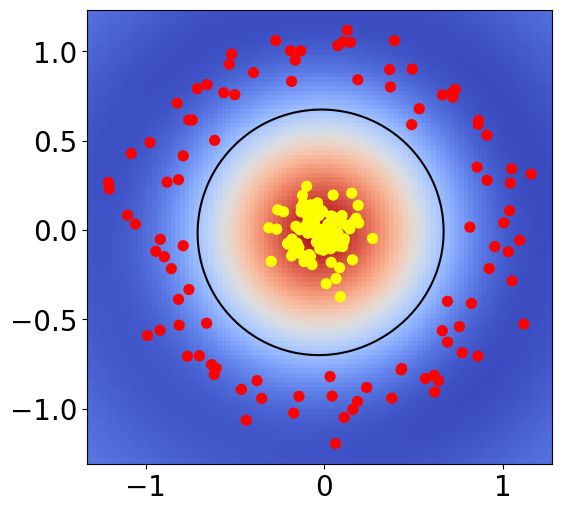

In [15]:
K = GaussianMDClassifier(sigma=0.5)
K.fit(X,t)
P=K.predict(X)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c=t, s=50, cmap='autumn')
plot_decision_function(K,ax)